# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [44]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


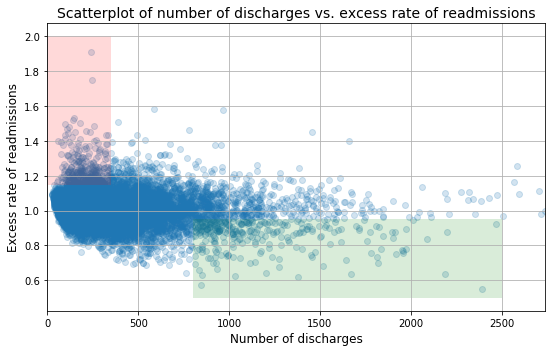

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
# Your turn

## Set Up Data
1. Remove NA rows
2. Create category for hospital size based on discharges

In [8]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [10]:
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notna()]
def assign_size_1(x):
    if x> 1000:
        size = 3
    elif x > 300:
        size = 2
    else:
        size = 1
    return size

def assign_size_2(x):
    if x> 1000:
        size = 3
    elif x > 100:
        size = 2
    else:
        size = 1
    return size

clean_hospital_read_df['size_1'] = clean_hospital_read_df['Number of Discharges'].apply(assign_size_1)
clean_hospital_read_df['size_2'] = clean_hospital_read_df['Number of Discharges'].apply(assign_size_2)

In [14]:
clean_hospital_read_df['size_2'].value_counts()

2    9811
1    1223
3     463
Name: size_2, dtype: int64

In [15]:
hospitals = clean_hospital_read_df

## Confirm report statistics

### Are point estimates correct?

Yes, Among hospitals with less than 100 discharges, 62% have excess readmission ratio > 1;  average excess readmission ratio = 1.022.  Amony hospitals with more than 1000 discharges, 44% have excess readmission ratio > 1; average excess readmission ratio =  0.9783


In [38]:
print('small hospital stats ------')
mask = hospitals['size_2'] == 1
print('mean excess readmission ratio:', hospitals.loc[mask, 'Excess Readmission Ratio'].mean())
print('hospitals with ratio > 1:', ((mask) & (hospitals['Excess Readmission Ratio'] > 1)).sum()/len(hospitals[mask]))

print('large hospital stats ------')
mask = hospitals['size_2'] == 3
print('mean excess readmission ratio:', hospitals.loc[mask, 'Excess Readmission Ratio'].mean())
print('hospitals with ratio > 1:', ((mask) & (hospitals['Excess Readmission Ratio'] > 1)).sum()/len(hospitals[mask]))


small hospital stats ------
mean excess readmission ratio: 1.0220883892068686
hospitals with ratio > 1: 0.6263286999182338
large hospital stats ------
mean excess readmission ratio: 0.9783354211663071
hospitals with ratio > 1: 0.4449244060475162


### Is there a significant relationship between discharges and excess readmission ratio?
Yes, it appears that small hospitals have different excess readmission ratios from larger hospitals

In [46]:
mask = hospitals['size_1'] == 3
ratio_small = hospitals.loc[mask, 'Excess Readmission Ratio']
mask = hospitals['size_1'] == 1
ratio_large = hospitals.loc[mask, 'Excess Readmission Ratio']
stats.ttest_ind(ratio_small, ratio_large, equal_var = False)

Ttest_indResult(statistic=-6.329666748137848, pvalue=5.507697109448094e-10)

In [39]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

X = scale(hospitals["Number of Discharges"])
y = hospitals["Excess Readmission Ratio"]

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     110.1
Date:                      Sat, 27 Oct 2018   Prob (F-statistic):           1.22e-25
Time:                              19:20:15   Log-Likelihood:                 11178.
No. Observations:                     11497   AIC:                        -2.235e+04
Df Residuals:                         11495   BIC:                        -2.234e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0075      0.001   1180.241      0.000       1.006       1.009
x1            -0.0090      0.001    -10.492      0.000      -0.011      -0.007
==============================================================================
Omnibus:                     1666.940   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.197
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       6.532   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Is there more to the story? 

We should also consider type of readmission.  Smaller hospitals seem similar to large hospitals in all readmission types except hip-knee.  In fact, most of the difference we see in overall readmission rates between small and large hospitals may be due to hip-knee. 

In [40]:
hospitals['Measure Name'].unique()

array(['READM-30-AMI-HRRP', 'READM-30-HF-HRRP', 'READM-30-PN-HRRP',
       'READM-30-COPD-HRRP', 'READM-30-HIP-KNEE-HRRP'], dtype=object)

ratio difference: 1.0330238263770561
Ttest_indResult(statistic=1.8221418659941642, pvalue=0.07818014465148165)


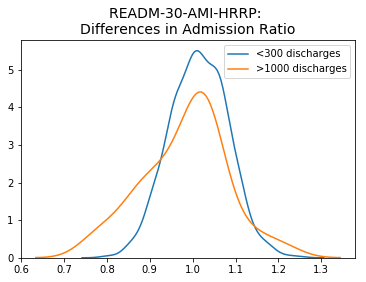

ratio difference: 1.0101863617436768
Ttest_indResult(statistic=1.4676146689624119, pvalue=0.1437100253676603)


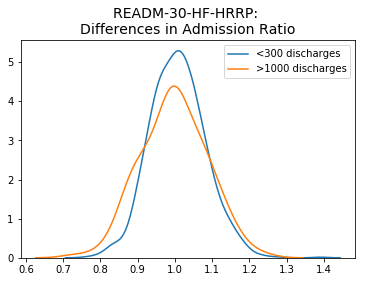

ratio difference: 0.986210531721152
Ttest_indResult(statistic=-1.0871278811271308, pvalue=0.2815502282340385)


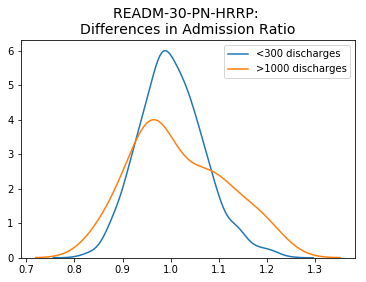

ratio difference: 0.9724045949636823
Ttest_indResult(statistic=-2.6637346161829347, pvalue=0.010060022623463666)


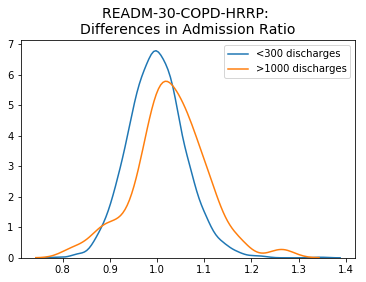

ratio difference: 1.238512632560106
Ttest_indResult(statistic=14.87463530258747, pvalue=9.768849983184928e-36)


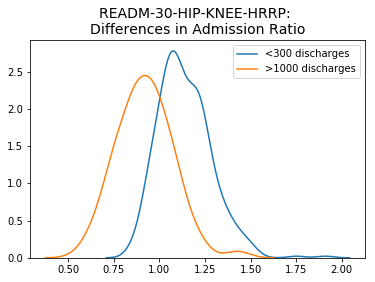

In [52]:
for i in hospitals['Measure Name'].unique():
    mask1 = (hospitals['size_1'] == 1) & (hospitals['Measure Name'] == i)
    mask2 = (hospitals['size_1'] == 3) & (hospitals['Measure Name'] == i)
    
    ratio_small = hospitals.loc[mask1, 'Excess Readmission Ratio']
    ratio_large = hospitals.loc[mask2, 'Excess Readmission Ratio']
    print('ratio difference:', ratio_small.mean()/ratio_large.mean())
    print(stats.ttest_ind(ratio_small, ratio_large, equal_var = False))
    
    sns.kdeplot(hospitals.loc[mask1, 'Excess Readmission Ratio'], label = '<300 discharges')
    sns.kdeplot(hospitals.loc[mask2, 'Excess Readmission Ratio'], label = '>1000 discharges')
    
    plt.title('%s: \nDifferences in Admission Ratio' %i, fontsize=14)

    plt.show()

## Overall Conclusion

Overall, I agree with their observation.  Small hospitals tend to have higher excess discharge ratios.  However, this excess readmission ratio difference is specifically seen in the hip-knee readmissions (p-value < 0.01). This difference also seemed to be clinically significant as the average excess readmission ratio for small hospitals was 1.23 times more than that for large hospitals.  All other surgeries showed no significant differences, though pneumonia readmissions showed a borderline insignificant difference (p-value = 0.01006).

Based on this information, I would advise the client to focus on improving performance specifically for hip-knee readmissions among smaller hospitals.  There could be many reasons why smaller hospitals perform worse than larger hospitals in hip-knee readmissions, but lack of resources may not be the root cause.  Lack of resources should impact all readmission types and not just those related to hip-knee.  Therefore, there must be something specific about hip-knee patients that may be affected by hospital size.  At this point, I do not have enough information to propose a reason why smaller hospitals underperform.  

My next recommendation would be to review the discharge protocol of hip-knee patients, and ensure they are the same between small and large hospitals.  If possible, I would also recommend a chart review of selected patients who were readmitted to understand what lead to their readmission.

## Notes on data display


The scatter plot is helpful because you plot individual values for each hospital and see if there's a relationship between size and excess readmission ratio.  It is clear in the plot that there is a large spread in the number of discharges and in the excess readmission ratios.  Furthermore, there is more variability in the readmission ratio among the smaller hospitals.  It also seems like there is a trend to have lower readmission ratios as discharges increase.  However, the disadvantage of this chart is that you cannot tell whether this trend is significant.  Also, because each individual hospital is plotted, it is hard to determine how important the outliers are.  The plot is oversaturated.  Are the poor performers an insignificant proportion of the small hospitals?  Or are they a substantial group that would shift the mean for small hospitals?

Because of these issues, I would prefer to show density plots.  I would overlay the distribution of readmission ratios for small hospitals over larger ones (as shown above).  That will allow the user to quickly assess the difference in mean and distribution of readmission ratios between large and small hospitals